In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# BAGIAN 1: PERSIAPAN & LOAD DATA
# ==========================================
# Mengatur gaya visualisasi agar terlihat profesional
sns.set(style="whitegrid")

# Load data (gunakan encoding ISO-8859-1 untuk karakter mata uang £)
# Coba baca sebagai file Excel
try:
    df = pd.read_excel(file_path)
    print("Ternyata ini file Excel, berhasil dibaca!")
except:
    print("Bukan file Excel.")

print(f"Data Mentah: {df.shape[0]} baris")

Bukan file Excel.
Data Mentah: 541909 baris


In [29]:
print(f"1. Status Awal: {df.shape[0]} baris (Data Mentah)")

1. Status Awal: 541909 baris (Data Mentah)


# TAHAP 1: PEMBERSIHAN DATA (CLEANING)

In [30]:
# 1. Hapus baris yang tidak ada CustomerID-nya
df_clean = df.dropna(subset=['CustomerID']).copy()

# 2. Hapus Transaksi Pembatalan/Retur (InvoiceNo diawali huruf 'C')
df_clean = df_clean[~df_clean['InvoiceNo'].astype(str).str.startswith('C')]

# 3. Hapus Data Aneh (Quantity negatif atau Harga 0)
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]

# 4. Hapus Duplikasi data (jika ada input ganda)
df_clean.drop_duplicates(inplace=True)

# 5. Konversi Kolom Tanggal agar bisa dianalisis per bulan
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

print(f"2. Status Akhir: {df_clean.shape[0]} baris (Data Bersih & Valid)")
print(f"   (Sebanyak {541909 - df_clean.shape[0]} baris data kotor telah dibuang)")

2. Status Akhir: 392692 baris (Data Bersih & Valid)
   (Sebanyak 149217 baris data kotor telah dibuang)


# TAHAP 2: MENAMBAH KOLOM (FEATURE ENGINEERING)

In [31]:
# Buat kolom Total Omzet (Revenue)
df_clean['TotalRevenue'] = df_clean['Quantity'] * df_clean['UnitPrice']

# Buat kolom Bulan (YYYY-MM)
df_clean['Month'] = df_clean['InvoiceDate'].dt.to_period('M')

# TAHAP 3: VISUALISASI INSIGHT BISNIS

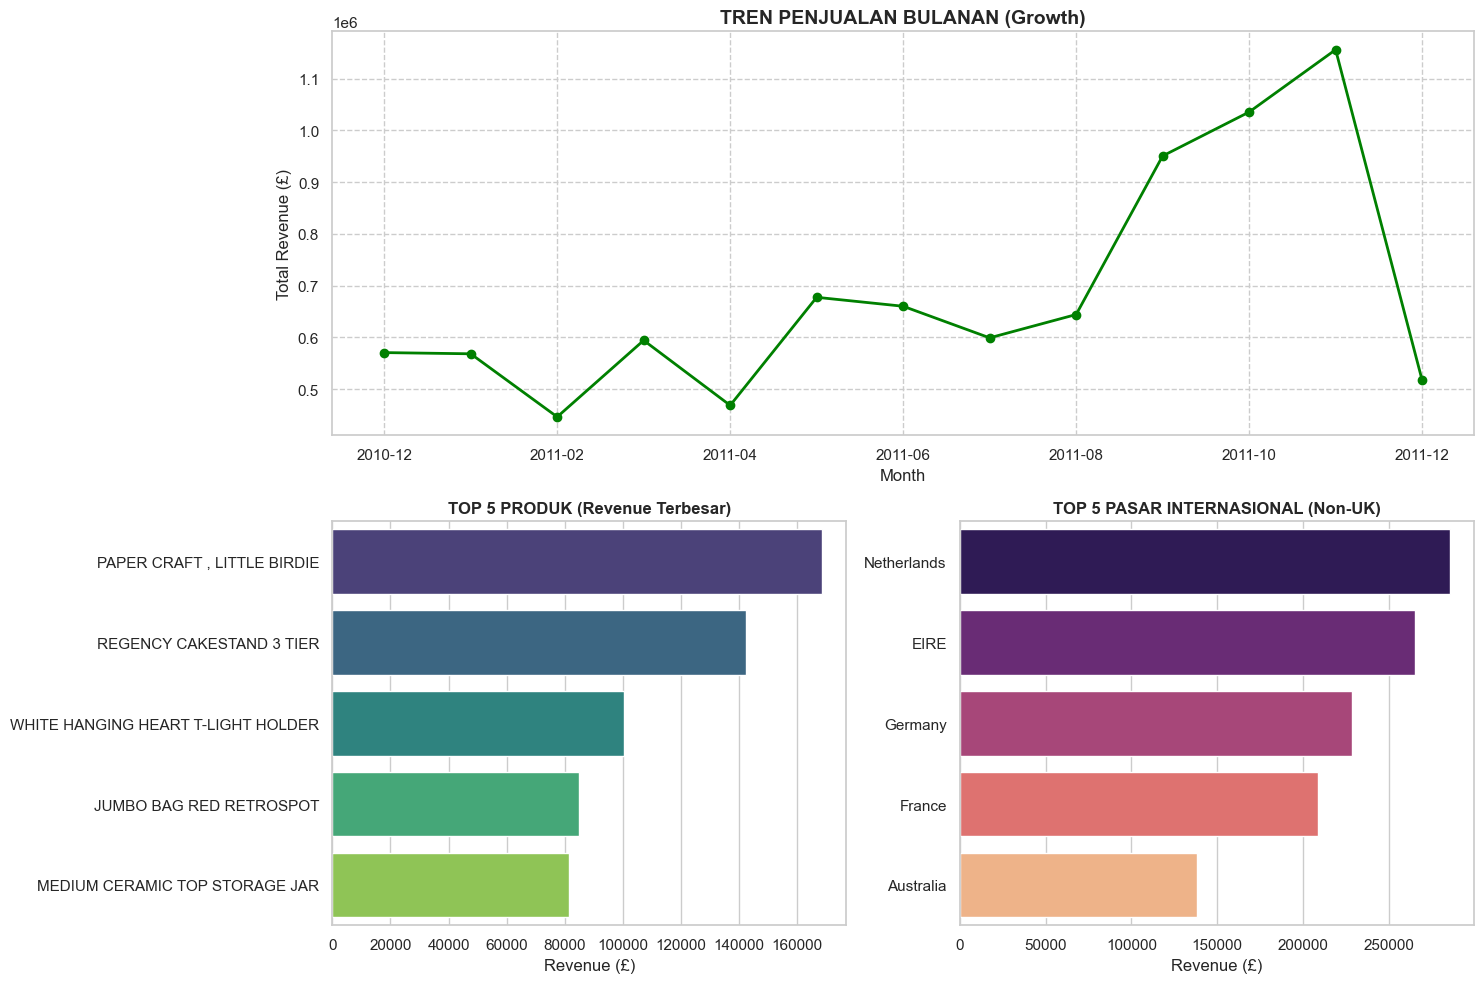

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(15, 10))
gs = fig.add_gridspec(2, 2)
sns.set(style="whitegrid")

# GRAFIK 1: Tren Penjualan Bulanan
ax1 = fig.add_subplot(gs[0, :])
monthly_sales = df_clean.groupby('Month')['TotalRevenue'].sum()

# Convert period to string
monthly_sales.index = monthly_sales.index.astype(str) 
monthly_sales.plot(kind='line', marker='o', color='green', ax=ax1, linewidth=2)
ax1.set_title('TREN PENJUALAN BULANAN (Growth)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Total Revenue (£)')
ax1.grid(True, linestyle='--')

# GRAFIK 2: Top 5 Produk (FIXED)
ax2 = fig.add_subplot(gs[1, 0])
top_products = df_clean.groupby('Description')['TotalRevenue'].sum().sort_values(ascending=False).head(5)

sns.barplot(
    x=top_products.values, 
    y=top_products.index, 
    hue=top_products.index,  
    palette='viridis', 
    legend=False,           
    ax=ax2
)
ax2.set_title('TOP 5 PRODUK (Revenue Terbesar)', fontsize=12, fontweight='bold')
ax2.set_xlabel('Revenue (£)')
ax2.set_ylabel('')

# GRAFIK 3: Top 5 Negara Non-UK (FIXED)
ax3 = fig.add_subplot(gs[1, 1])
non_uk = df_clean[df_clean['Country'] != 'United Kingdom']
top_country = non_uk.groupby('Country')['TotalRevenue'].sum().sort_values(ascending=False).head(5)

sns.barplot(
    x=top_country.values, 
    y=top_country.index, 
    hue=top_country.index, 
    palette='magma', 
    legend=False, 
    ax=ax3
)
ax3.set_title('TOP 5 PASAR INTERNASIONAL (Non-UK)', fontsize=12, fontweight='bold')
ax3.set_xlabel('Revenue (£)')
ax3.set_ylabel('')

plt.tight_layout()
plt.show()

# TAHAP 4: RINGKASAN UNTUK MANAJEMEN

In [38]:
total_omzet = df_clean['TotalRevenue'].sum()
top_customer = df_clean.groupby('CustomerID')['TotalRevenue'].sum().sort_values(ascending=False).head(1)

print("\n=== RINGKASAN EKSEKUTIF ===")
print(f"Total Pendapatan Bersih : £ {total_omzet:,.2f}")
print(f"Total Transaksi Valid   : {df_clean.shape[0]} transaksi")
print(f"Pelanggan Paling Loyal  : ID {top_customer.index[0]} (Belanja £ {top_customer.values[0]:,.2f})")


=== RINGKASAN EKSEKUTIF ===
Total Pendapatan Bersih : £ 8,887,208.89
Total Transaksi Valid   : 392692 transaksi
Pelanggan Paling Loyal  : ID 14646.0 (Belanja £ 280,206.02)
